# EDA - ANALISIS EXPLORATORIO DE LOS DATOS

Llevaremos a cabo el analisis exploratorio de los datos despues de haber pasado por el proceso de ETL en cada uno de los datasets que nos fueron proporcionados, con el objetivo de analizar mas a profundidad nuestros datos y asi poder obtener una compresion mas profunda de ellos

In [51]:
# importamos librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [52]:
# cargamos dataframes
user_reviews=pd.read_parquet('data/clean_user_reviews.parquet')
user_items=pd.read_parquet('data/clean_user_items.parquet')
steam_games=pd.read_parquet('data/clean_steam_games.parquet')

# user_reviews.parquet

Abrimos el dataset resultantes despues de haberle aplicado el proceso de ETL para hacerle el proceso de analisis exploratorio

In [53]:
user_reviews

,user_id,item_id,recommend,review,year,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
3,js41637,251610,True,I know what you think when you see this title ...,2014,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,0
...,...,...,...,...,...,...
55308,76561198312638244,130,True,if you liked Half life i would really recommen...,2014,2
55309,76561198312638244,70,True,a must have classic from steam definitely wort...,2014,2
55310,76561198312638244,362890,True,this game is a perfect remake of the original ...,2014,2
55311,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,2014,2


In [54]:
# informacion general del dataframe
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55313 entries, 0 to 55312
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             55313 non-null  object
 1   item_id             55313 non-null  int32 
 2   recommend           55313 non-null  bool  
 3   review              55313 non-null  object
 4   year                55313 non-null  int32 
 5   sentiment_analysis  55313 non-null  int64 
dtypes: bool(1), int32(2), int64(1), object(2)
memory usage: 1.7+ MB


In [55]:
# chequeamos valores nulos
user_reviews.isnull().sum()

user_id               0
item_id               0
recommend             0
review                0
year                  0
sentiment_analysis    0
dtype: int64

al ver que no hay valores nulos, podemos iniciar con nuestro analisis

Analisis columna user_id:

In [56]:
# contamos la cantidad de usuarios que tenemos en el dataset
cantidad_usuarios=len(user_reviews['user_id'].unique())
print(f'cantidad de usuarios en el dataset: {cantidad_usuarios}')

cantidad de usuarios en el dataset: 24203


Se puede concluir que en la plataforma hay un total de 24,203 de usuarios unicos registrados

Analisis columna recommend:

In [57]:
# contamos la cantidad de recomnendaciones realizadas
user_reviews['recommend'].value_counts()

recommend
True     48735
False     6578
Name: count, dtype: int64

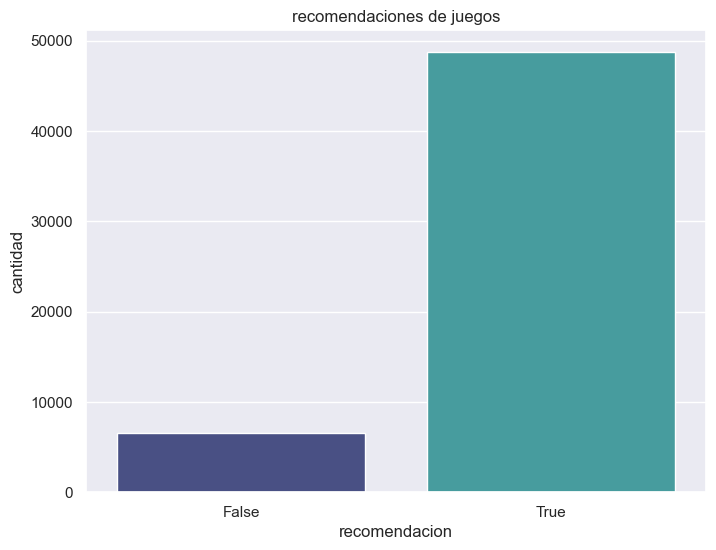

In [58]:
# visualizamos la columna 'recommend'
plt.figure(figsize=(8,6))
ax=sns.countplot(x='recommend', data=user_reviews, palette='mako')
ax.set(xlabel='recomendacion', ylabel='cantidad', title='recomendaciones de juegos')
plt.show()

CONCLUSION:

Las estadisticas de nuestro analisis revelan que se generaron un total de 48,735 recomendaciones, lo que evidencia un alto nivel de participacion por parte de los usuarios, quienes en promedio realizaron mas de una recomendacion de juego

Analisis columna sentiment_analysis:

In [59]:
# hacemos el conteo de cada una de las cateogorias de la columna 'sentiment_analysis'
user_reviews['sentiment_analysis'].value_counts()

sentiment_analysis
2    31127
0    12381
1    11805
Name: count, dtype: int64

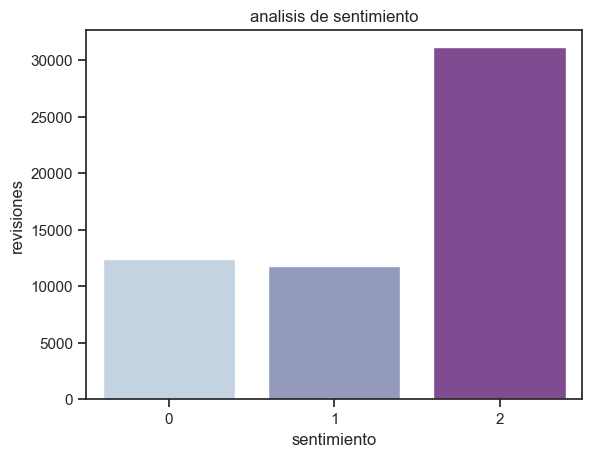

In [60]:
sns.set(style='ticks')
ax=sns.countplot(x='sentiment_analysis', data=user_reviews, palette='BuPu')
ax.set(xlabel='sentimiento', ylabel='revisiones', title='analisis de sentimiento')
plt.show()

REPRESENTACIONES DE LOS NUMEROS EN EL ANALISIS DE SENTIMIENTO:

2 = positivo

0 = negativo

1 = neutral



CONCLUSION:


En nuestro analisis pudimos ver que las revisiones positivas fueron las mas numerosas, con un total de 31.127. Las revisiones negativas fueron la segunda categoria más frecuente, con 12.381, seguidas de las revisiones neutrales, con 11.805

# steam_games.parquet

Abrimos el dataset resultantes despues de haberle aplicado el proceso de ETL para hacerle el proceso de analisis exploratorio

In [61]:
steam_games

,item_id,app_name,genres,developer,price,release_year
0,761140,Lost Summoner Kitty,Action,Kotoshiro,4.99,2018
1,761140,Lost Summoner Kitty,Casual,Kotoshiro,4.99,2018
2,761140,Lost Summoner Kitty,Indie,Kotoshiro,4.99,2018
3,761140,Lost Summoner Kitty,Simulation,Kotoshiro,4.99,2018
4,761140,Lost Summoner Kitty,Strategy,Kotoshiro,4.99,2018
...,...,...,...,...,...,...
68012,610660,Russian Roads,Indie,Laush Dmitriy Sergeevich,1.99,2018
68013,610660,Russian Roads,Racing,Laush Dmitriy Sergeevich,1.99,2018
68014,610660,Russian Roads,Simulation,Laush Dmitriy Sergeevich,1.99,2018
68015,658870,Exit Directions,Casual,"xropi,stev3ns",4.99,2017


In [62]:
# informacion general del dataframe
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68017 entries, 0 to 68016
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       68017 non-null  int32  
 1   app_name      68017 non-null  string 
 2   genres        68017 non-null  object 
 3   developer     68017 non-null  object 
 4   price         68017 non-null  float64
 5   release_year  68017 non-null  int32  
dtypes: float64(1), int32(2), object(2), string(1)
memory usage: 2.6+ MB


In [63]:
# chequeamos valores nulos
steam_games.isnull().sum()

item_id         0
app_name        0
genres          0
developer       0
price           0
release_year    0
dtype: int64

al ver que no hay valores nulos, podemos iniciar con nuestro analisis

Analisis columna genres:

In [64]:
# analizamos la cantidad de juegos que tiene cada genero en la plataforma
steam_games['genres'].value_counts()

genres
Indie                        15081
Action                       10638
Casual                        8052
Adventure                     7781
Strategy                      6676
Simulation                    6494
RPG                           5106
Free to Play                  1869
Early Access                  1382
Sports                        1206
Racing                        1048
Massively Multiplayer          993
Design &amp; Illustration      451
Utilities                      319
Web Publishing                 259
Animation &amp; Modeling       172
Education                      122
Video Production               103
Software Training               99
Audio Production                82
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [65]:
print(len(steam_games['item_id'].unique()))
print(steam_games.shape[0])

27458
68017


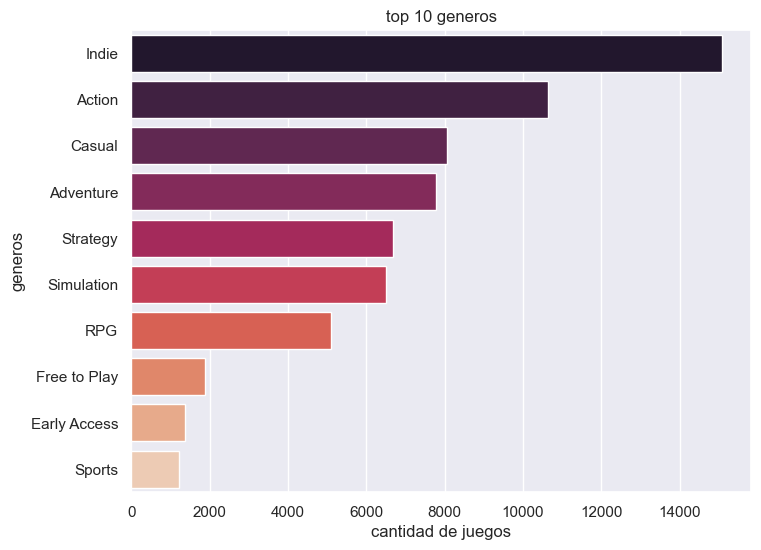

In [66]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
ax=sns.countplot(y='genres', data=steam_games, palette='rocket', order=steam_games['genres'].value_counts().index[:10])
ax.set(xlabel='cantidad de juegos', ylabel='generos', title='top 10 generos')
plt.show()

CONCLUSION:

En base a los resultados de nuestro analisis concluimos que al observar la frecuencia de los diferentes generos, podemos destacar que Indie, Action, Casual y Adventure son los generos que mas juegos acumulan en la plataforma

Analisis columna developer:

In [67]:
steam_games['developer'].value_counts()


developer
Ubisoft - San Francisco                2514
SmiteWorks USA, LLC                    2361
DL Softworks                            495
Ronimo Games                            379
Paradox Development Studio              304
                                       ... 
Vicious Cycle Software, Inc.              1
Lucid Games,Aspyr (Mac &amp; Linux)       1
Xoron GmbH                                1
KrossRails,Dovetail Games                 1
Katatema,Watson                           1
Name: count, Length: 10603, dtype: int64

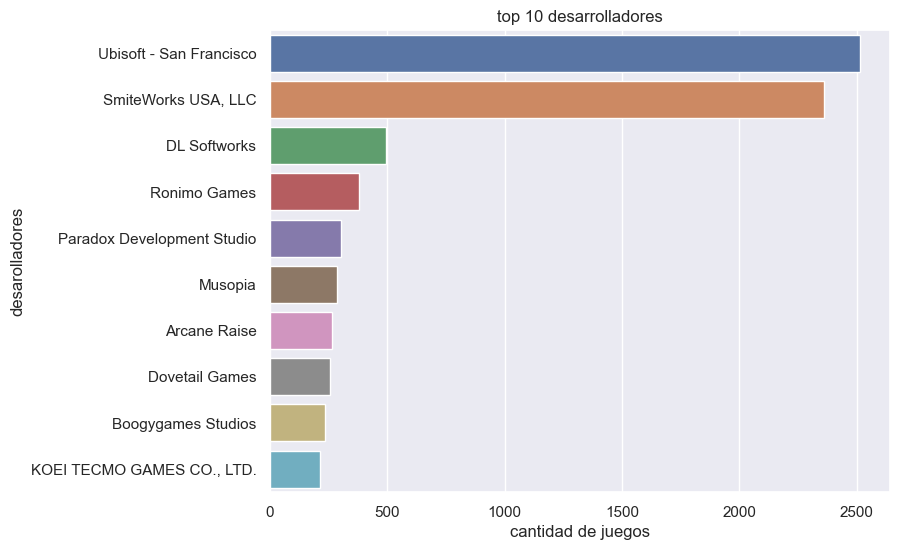

In [68]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y='developer', data=steam_games, order=steam_games['developer'].value_counts().index[:10])
ax.set(xlabel='cantidad de juegos', ylabel='desarolladores', title='top 10 desarrolladores')
plt.show()

CONCLUSION:

Por medio de nuestro analisis concluimos que Ubisoft y SmiteWorks se destacan como los principales desarrolladores, con una cantidad de juegos mucho mayor que la de los otros desarrolladores de la plataforma

Analisis columna item_id

In [69]:
cantidad_juegos_steam= len(steam_games['item_id'].unique())
print(f'cantidad juegos: {cantidad_juegos_steam}')

cantidad juegos: 27458


CONCLUSION:

La plataforma steam ofrece una gran variedad de juegos (item_id), con un total de 27,459 juegos disponibles para los usuarios

Analisis release_year

In [70]:
# contamos los diferentes juegos estrenados por año
steam_games['release_year'].value_counts()

release_year
2017    24597
2016    17289
2015    11319
2014     5805
2013     2832
2012     2024
2011      949
2010      657
2009      475
2008      320
2007      254
2018      235
2006      212
2005      128
2003      117
2001       97
2004       90
1998       72
1999       71
1997       64
2002       60
1996       56
2000       54
1994       51
1995       48
1993       39
1992       24
1991       19
1989       11
1990       11
1988        9
2019        6
1986        5
1984        5
1987        5
2021        3
1983        3
1985        1
Name: count, dtype: int64

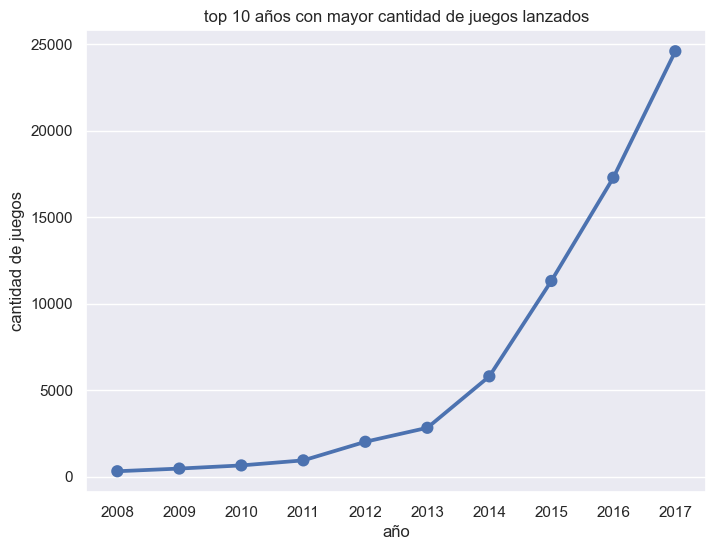

In [71]:
anios_lanzamiento=steam_games['release_year'].value_counts()[:10]
cantidad_juegos=anios_lanzamiento.index

plt.figure(figsize=(8,6))
sns.pointplot(x=cantidad_juegos, y=anios_lanzamiento, linestyles='-')
plt.xlabel('año')
plt.ylabel('cantidad de juegos')
plt.title('top 10 años con mayor cantidad de juegos lanzados')
plt.show()


CONCLUSION:

Al analizar los 10 años con mayor cantidad de lanzamientos en la plataforma Steam, se observa una concentracion de lanzamientos entre los años 2008 al 2011, evidenciando un notable ascenso hasta llegar a un pico en el año 2017, lo que nos lleva a la conclusion de que el 2017 fue el año con la mayor cantidad de juegos lanzados

analisis columna price

In [72]:
# chequeamos informacion estadistica de la columna 'price'
steam_games['price'].describe()

count    68017.000000
mean         8.844288
std         16.046619
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [73]:
# conteo de valores en la columna 'price'
steam_games['price'].value_counts()

price
4.99     9404
9.99     8656
2.99     7543
0.99     6136
1.99     5603
         ... 
14.95       1
42.99       1
26.99       1
99.00       1
27.49       1
Name: count, Length: 135, dtype: int64

hacemos el tratamiento de los outliers de la columna 'price' por medio del metodo del rango intercuartilico (IQR)

In [74]:
# calculamos IQR (rango intercuartil)
Q1= steam_games['price'].quantile(0.25)
Q3= steam_games['price'].quantile(0.75)
IQR= Q3 - Q1

outliers= pd.DataFrame({'Q1': [Q1], 'Q3': [Q3], 'IQR': [IQR]}, index=[0])
outliers

,Q1,Q3,IQR
0,2.99,9.99,7.0


establecemos el umbral para los valores atipicos

In [86]:
upper_bound= Q3 + 1.5 * IQR
lower_bound= Q1 - 1.5 * IQR
boundaries= pd.DataFrame({'upper bound': [upper_bound], 'lower bound': [lower_bound]})
boundaries

,upper bound,lower bound
0,20.49,-7.51


In [87]:
outliers_upper= steam_games[steam_games['price']> upper_bound]
outliers_lower= steam_games[steam_games['price']< lower_bound]

In [88]:
outliers_upper.reset_index(drop=True, inplace=True)
outliers_upper

,item_id,app_name,genres,developer,price,release_year
0,774278,Snow All Access Legend Pass,Free to Play,Poppermost Productions,29.99,2018
1,774278,Snow All Access Legend Pass,Indie,Poppermost Productions,29.99,2018
2,774278,Snow All Access Legend Pass,Simulation,Poppermost Productions,29.99,2018
3,774278,Snow All Access Legend Pass,Sports,Poppermost Productions,29.99,2018
4,774279,Snow Lifetime Pack,Free to Play,Poppermost Productions,59.99,2018
...,...,...,...,...,...,...
4043,719590,Mesozoica,Simulation,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4044,719590,Mesozoica,Strategy,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4045,719590,Mesozoica,Early Access,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4046,755310,Cyberlink Youcam Deluxe,Utilities,CyberLink,29.99,2017


In [89]:
outliers_lower.reset_index(drop=True, inplace=True)
outliers_lower

,item_id,app_name,genres,developer,price,release_year


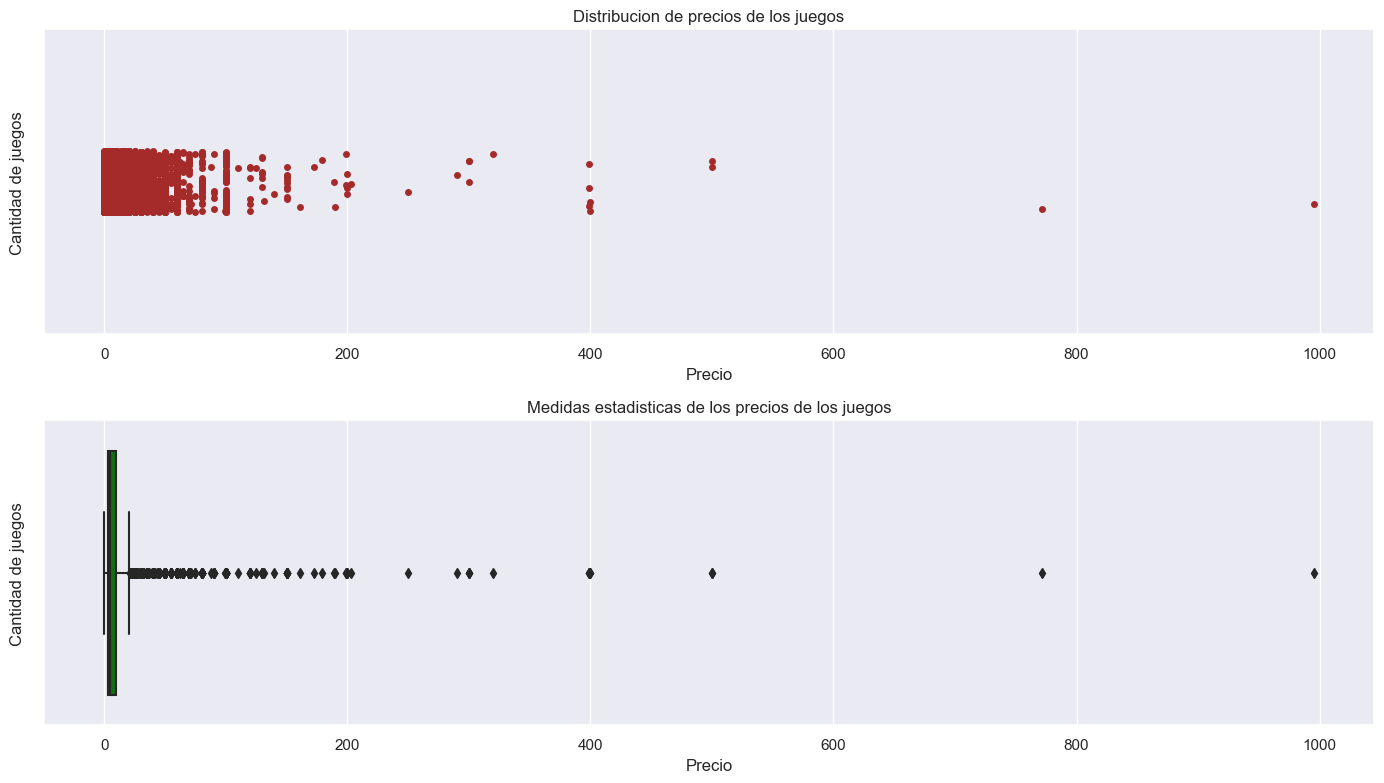

In [95]:
# recopilamos los precios de cada juego y creamos un dataframe con la data
price = steam_games.groupby('item_id')['price'].unique().reset_index().explode('price')

fig = plt.figure(figsize=(14, 8))

# utilizamos stripplot para visualizar la distribucion de los precios
axis1 = fig.add_subplot(211)
sns.stripplot(data=price, x='price', ax=axis1, color="brown")
axis1.set_xlabel('Precio')
axis1.set_ylabel('Cantidad de juegos')
axis1.set_title('Distribucion de precios de los juegos')

# utilizamos boxplot para representar visualmente las medidas estadisticas
axis2 = fig.add_subplot(212, sharex=axis1)
sns.boxplot(data=price, x='price', ax=axis2, color="green")
axis2.set_xlabel('Precio')
axis2.set_ylabel('Cantidad de juegos')
axis2.set_title('Medidas estadisticas de los precios de los juegos')

#Muestra y ajusta el espaciado entre los subgráficos.
plt.tight_layout()
plt.show()

In [98]:
# resumen estadistico de la columna price
steam_games['price'].describe()

count    68017.000000
mean         8.844288
std         16.046619
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

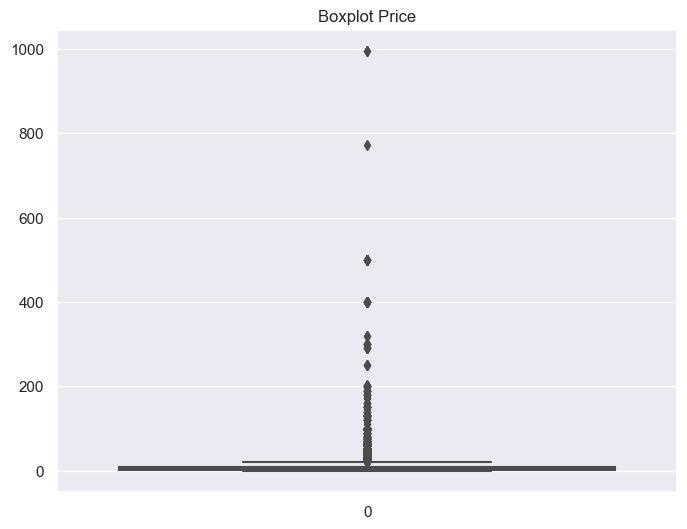

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(steam_games, y='price')
plt.title('Boxplot Price')
plt.show()

CONCLUSION:

- los precios de los juegos en la plataforma van desde los gratuitos hasta a 995

- el precio promedio es de 8, lo que nos muestra una tendencia hacia precios mas economicos 

- observamos un sesgo en la distribucion de los datos ya que tambien hay una cantidad considerable de juegos con precios altos

- identificamos 4048 valores atipicos por medio del metodo intercuartilico (IQR)

- el 50% de los precios de los juegos estan entre 0 a 4.99

# user_items.parquet

Abrimos el dataset resultantes despues de haberle aplicado el proceso de ETL para hacerle el proceso de analisis exploratorio

In [78]:
user_items

,item_id,item_name,playtime_forever,user_id,items_count
0,10,Counter-Strike,6.0,76561197970982479,277
1,30,Day of Defeat,7.0,evcentric,137
2,300,Day of Defeat: Source,4733.0,maplemage,629
3,3830,Psychonauts,333.0,corrupted_soul,115
4,3900,Sid Meier's Civilization IV,338.0,jorellpogi,71
...,...,...,...,...,...
48323,213650,Dwarfs F2P,62.0,76561198320136420,321
48324,219340,The Banner Saga: Factions,11.0,ArkPlays7,4
48325,202090,Magicka: Wizard Wars,1501.0,76561198323066619,22
48326,239220,The Mighty Quest For Epic Loot,2374.0,76561198326700687,177


In [79]:
# informacion general dataframe
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48328 entries, 0 to 48327
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           48328 non-null  int32  
 1   item_name         48328 non-null  object 
 2   playtime_forever  48328 non-null  float64
 3   user_id           48328 non-null  object 
 4   items_count       48328 non-null  int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 1.5+ MB


In [80]:
# chequeo de valores nulos
user_items.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
user_id             0
items_count         0
dtype: int64

al ver que no hay valores nulos, podemos iniciar con nuestro analisis

analisis columna playtime_forever

In [81]:
user_items['playtime_forever']

0           6.0
1           7.0
2        4733.0
3         333.0
4         338.0
          ...  
48323      62.0
48324      11.0
48325    1501.0
48326    2374.0
48327    2973.0
Name: playtime_forever, Length: 48328, dtype: float64

In [82]:
# hacemos una agrupacion de usuarios por tiempo jugado , almacenandolo en un dataframe para posteriormente graficarlo
contador_horas_jugadas= user_items.groupby('user_id')['playtime_forever'].unique().explode()
contador_horas_jugadas= pd.DataFrame(contador_horas_jugadas)
contador_horas_jugadas_filtrado= contador_horas_jugadas.sort_values('playtime_forever', ascending=False)


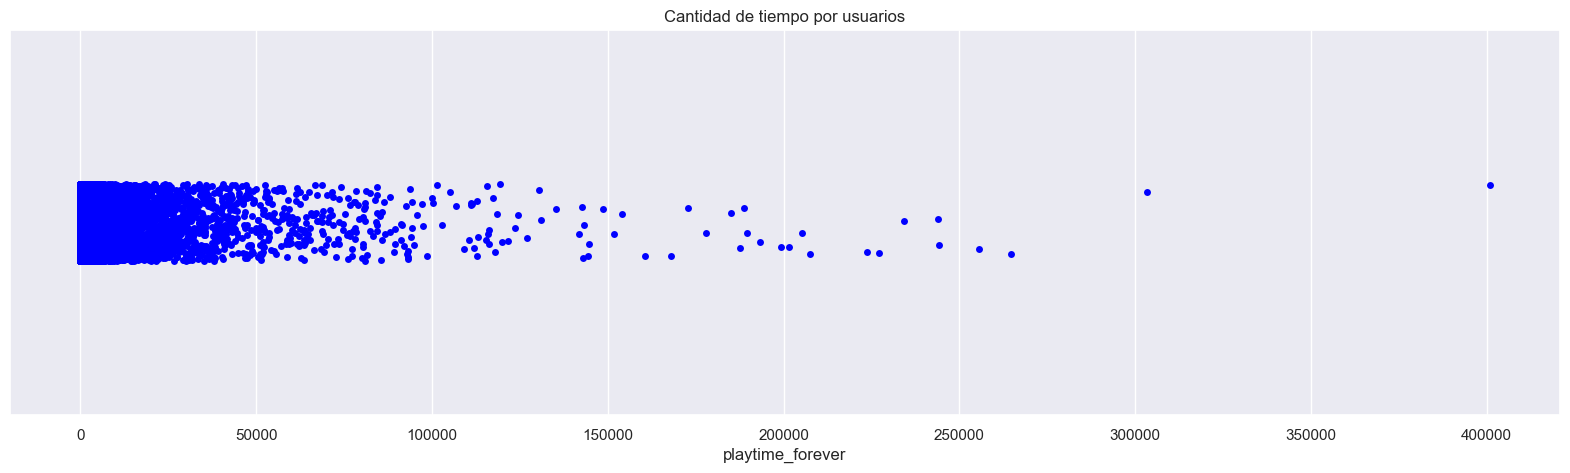

In [83]:
plt.figure(figsize=(20,5))
ax=sns.stripplot(data=contador_horas_jugadas, x='playtime_forever', color="blue")
ax.set(xlabel='playtime_forever', title='Cantidad de tiempo por usuarios')
plt.show()


In [84]:
contador_horas_jugadas.describe()

,playtime_forever
count,48327.0
unique,7166.0
top,1.0
freq,1534.0


CONCLUSION:

Podemos concluir en nuestro analisis que el tiempo total jugado entre todos los usuarios de la plataforma es de 48,327 minutos, lo que equivale a 805 horas y 47 minutos, tambien pudimos observar que el valor mas repedito (7,166) es 1, lo que nos lleva a concluir que una hora ha sido el tiempo de juego mas popular entre los usuarios

